In [1]:
MAKE_BOOK_FIGURES=True
import numpy as np
import scipy.stats as st

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

def set_book_style():
    plt.style.use('seaborn-v0_8-white') 
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings
        'font.family': 'serif',  # For academic publishing
        'font.size': 8,  # As requested, 10pt font
        'axes.labelsize': 8,
        'axes.titlesize': 8,
        'xtick.labelsize': 7,  # Slightly smaller for better readability
        'ytick.labelsize': 7,
        'legend.fontsize': 7,
        
        # Line and marker settings for consistency
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,
        
        # Layout to prevent clipped labels
        'figure.constrained_layout.use': True,
        
        # Default DPI (will override when saving)
        'figure.dpi': 600,
        'savefig.dpi': 600,
        
        # Despine - remove top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,
        
        # Remove legend frame
        'legend.frameon': False,
        
        # Additional trim settings
        'figure.autolayout': True,  # Alternative to constrained_layout
        'savefig.bbox': 'tight',    # Trim when saving
        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off
    })

def set_notebook_style():
    plt.style.use('seaborn-v0_8-white')
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings - using default sizes
        'font.family': 'serif',
        'axes.labelsize': 10,
        'axes.titlesize': 10,
        'xtick.labelsize': 9,
        'ytick.labelsize': 9,
        'legend.fontsize': 9,
        
        # Line and marker settings
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,
        
        # Layout settings
        'figure.constrained_layout.use': True,
        
        # Remove only top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,
        
        # Remove legend frame
        'legend.frameon': False,
        
        # Additional settings
        'figure.autolayout': True,
        'savefig.bbox': 'tight',
        'savefig.pad_inches': 0.1
    })

def save_for_book(fig, filename, is_vector=True, **kwargs):
    """
    Save a figure with book-optimized settings.
    
    Parameters:
    -----------
    fig : matplotlib figure
        The figure to save
    filename : str
        Filename without extension
    is_vector : bool
        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.
    **kwargs : dict
        Additional kwargs to pass to savefig
    """    
    # Set appropriate DPI and format based on figure type
    if is_vector:
        dpi = 1000
        ext = '.pdf'
    else:
        dpi = 600
        ext = '.tif'
    
    # Save the figure with book settings
    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)

def make_full_width_fig():
    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)

def make_half_width_fig():
    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)

if MAKE_BOOK_FIGURES:
    set_book_style()
else:
    set_notebook_style()

make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()
make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

(classification_decision_making)=
# Decision making

We demonstrate how to use the results of a binary classifier to make decisions.

## High melting explosives sensitivity
Let's repeat what we did for the HMX example after splitting the dataset into training and validation subsets.
We will be making predictions on the validation subset.

In [2]:
url = "https://raw.githubusercontent.com/PredictiveScienceLab/data-analytics-se/master/lecturebook/data/hmx_data.csv"
!curl -O $url

import pandas as pd
data = pd.read_csv('hmx_data.csv')
x = data['Height'].values
label_coding = {'E': 1, 'N': 0}
y = np.array([label_coding[r] for r in data['Result']])
data['y'] = y
data.head()

,Height,Result,y
0,40.5,E,1
1,40.5,E,1
2,40.5,E,1
3,40.5,E,1
4,40.5,E,1


Separate data into training and validation:

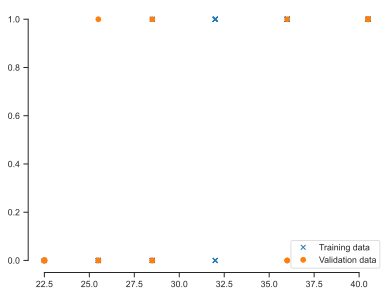

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.33)

num_obs = x.shape[0]

fig, ax = plt.subplots()
ax.plot(x_train, y_train, 'x', label='Training data')
ax.plot(x_valid, y_valid, 'o', label='Validation data')
plt.legend(loc='best', frameon=True)
sns.despine(trim=True);

Train the model:

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

# Design matrix
poly = PolynomialFeatures(2)
Phi = poly.fit_transform(x[:, None])

# Fit
model = LogisticRegression(
    penalty=None,
    fit_intercept=False
).fit(Phi, y)

Make probabilistic predictions on the validation data:

In [5]:
Phi_valid = poly.fit_transform(x_valid[:, None])
predictions = model.predict_proba(Phi_valid)
print('x\tp(y=0|x)\tp(y=1|x)\tTrue label')
print('-' * 80)
for i in range(x_valid.shape[0]):
    print(
        f"{x_valid[i]:1.2f}\t"
        + f"{predictions[i, 0]:1.2f}\t\t"
        + f"{predictions[i, 1]:1.2f}\t\t"
        + f"{y_valid[i]:d}"
    )

x	p(y=0|x)	p(y=1|x)	True label
--------------------------------------------------------------------------------
22.50	0.93		0.07		0
28.50	0.75		0.25		0
40.50	0.01		0.99		1
36.00	0.10		0.90		0
25.50	0.88		0.12		0
28.50	0.75		0.25		1
22.50	0.93		0.07		0
36.00	0.10		0.90		1
22.50	0.93		0.07		0
40.50	0.01		0.99		1
40.50	0.01		0.99		1
25.50	0.88		0.12		0
36.00	0.10		0.90		0
28.50	0.75		0.25		0
25.50	0.88		0.12		1
22.50	0.93		0.07		0
22.50	0.93		0.07		0
22.50	0.93		0.07		0
40.50	0.01		0.99		1
40.50	0.01		0.99		1


And here is a nice way to visualize these probabilities:

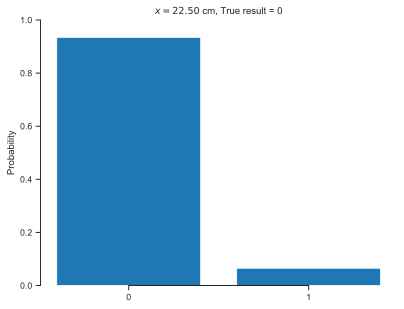

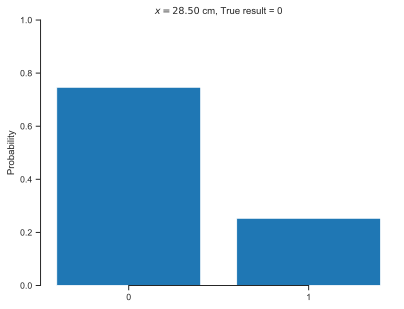

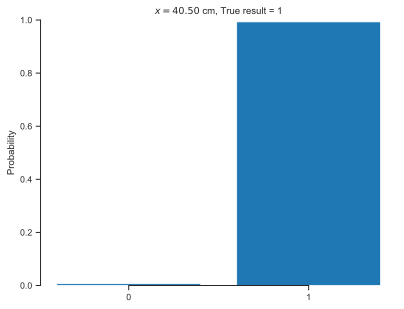

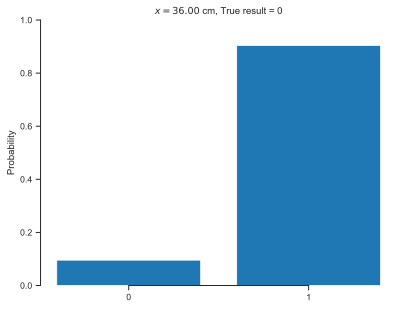

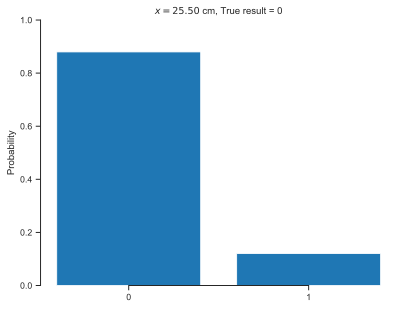

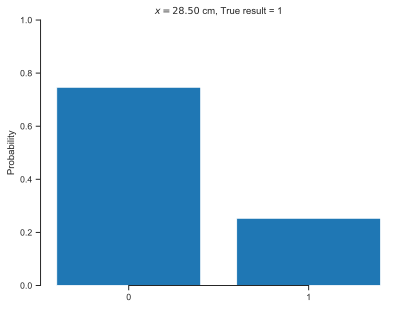

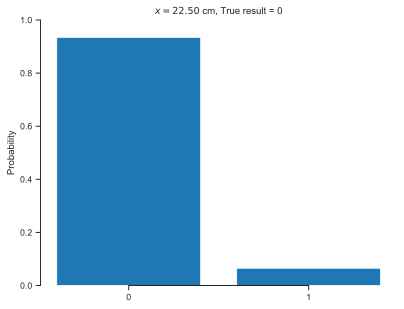

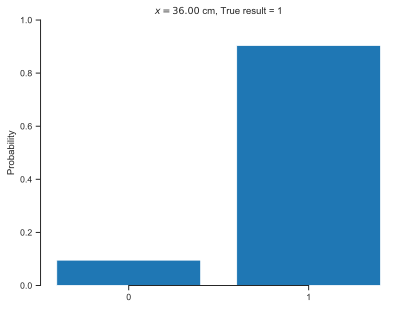

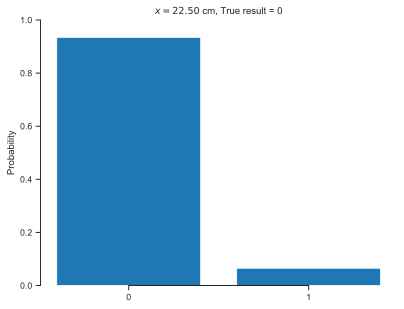

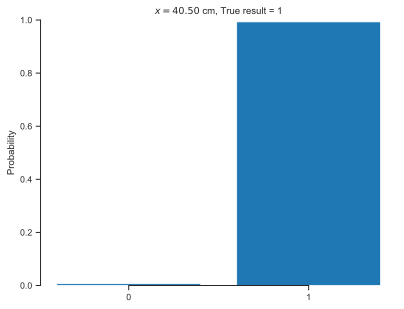

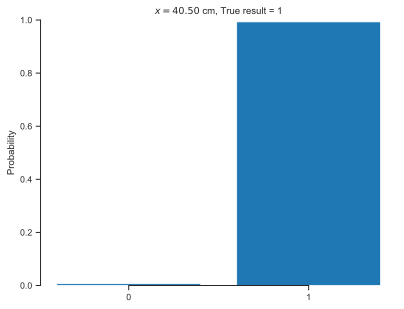

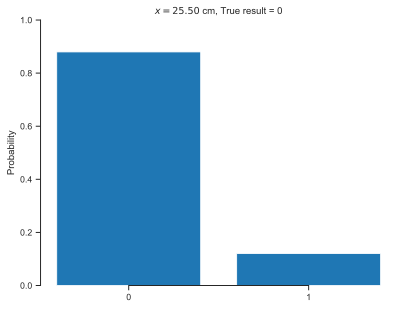

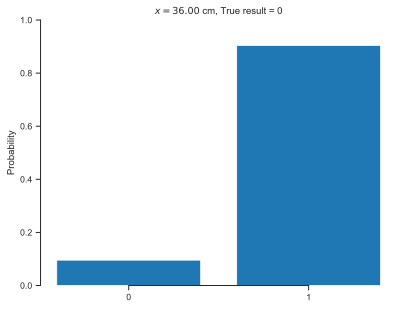

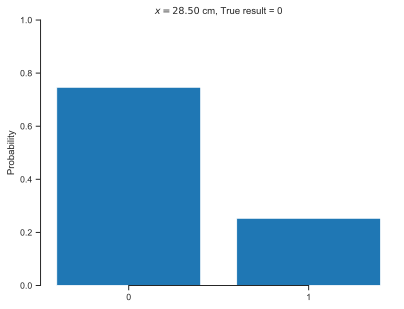

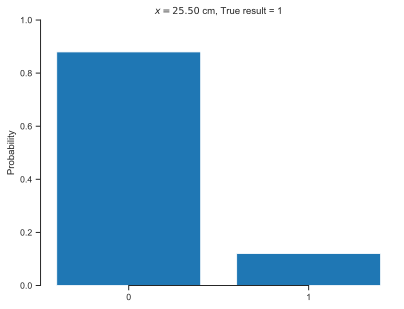

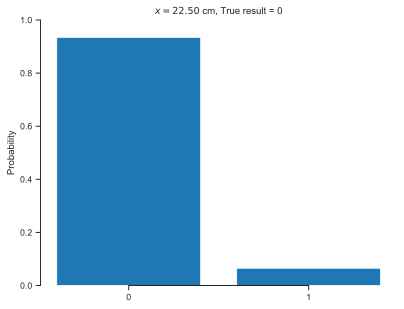

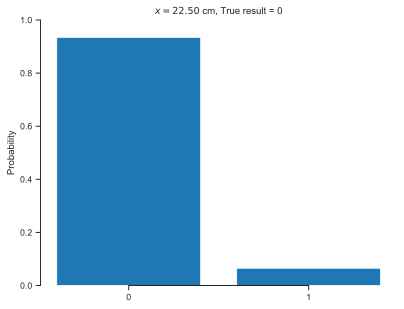

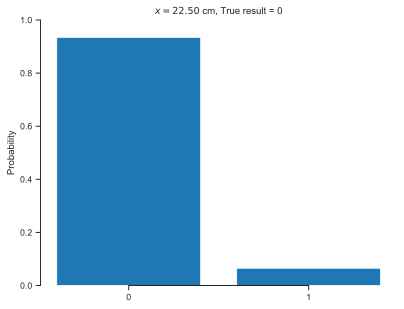

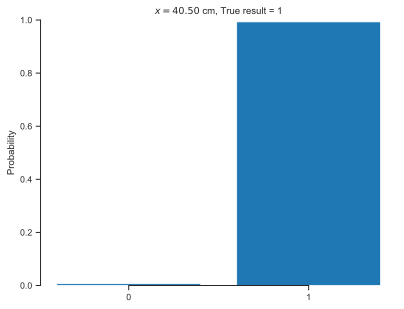

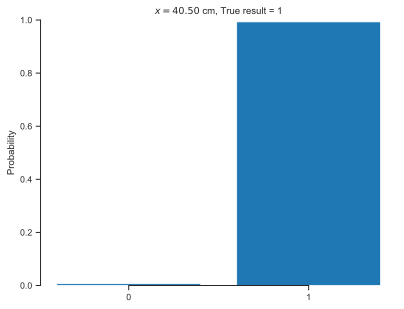

In [6]:
for i in range(x_valid.shape[0]):
    fig, ax = plt.subplots()
    ax.bar(np.arange(2), predictions[i])
    ax.set_title(f'$x={x_valid[i]:1.2f}$ cm, True result = {y_valid[i]:d}')
    ax.set_ylim([0, 1.0])
    ax.set_xticks([0, 1])
    ax.set_xticklabels(model.classes_)
    ax.set_ylabel('Probability')
    sns.despine(trim=True)

Now we are ready to pose and solve the decision-making problem.
We just need to define a cost matrix:

In [7]:
# c_00 = cost of correctly picking 0 when 0 is true
# c_01 = cost of wrongly picking 0 when 1 is true
# c_11 = cost of correctly picking 1 when 1 is true
# c_10 = cost of wrongly picking 1 when 0 is true
cost_matrix = np.array(
    [
        [0.0, 1.0],
        [1.0, 0.0]
    ]
)

Here is some code that computes the expected cost of each choice given the predicted probabilities:

In [8]:
def expected_cost(cost_matrix, prediction_prob):
    """Calculate the expected cost of each decision.
    
    Arguments
    cost_matrix     --  A D x D matrix. `cost_matrix[i, j]`
                        is the cost of picking `i` and then
                        `j` happens.
    prediction_prob --  An array with D elements containing
                        the probability that each event
                        happens.
    """
    assert cost_matrix.ndim == 2
    D = cost_matrix.shape[0]
    assert cost_matrix.shape[1] == D
    assert prediction_prob.ndim == 1
    assert prediction_prob.shape[0] == D
    res = np.zeros((2,))
    for i in range(2):
        res[i] = (
            cost_matrix[i, 0] * prediction_prob[0]
            + cost_matrix[i, 1] * prediction_prob[1]
        )
    return res

As a demonstration, here is the expected cost of each decision for the first few validation points.
We will put a star (\*) next to the choice with minimum cost.

In [9]:
print('x\tCost of 0\tCost of 1\tTrue label\tChoice')
print('-' * 80)
for i in range(x_valid.shape[0]):
    exp_c = expected_cost(cost_matrix, predictions[i])
    line = f'{x_valid[i]:1.2f}\t{exp_c[0]:1.2f}'
    tmp = f'\t\t{exp_c[1]:1.2f}'
    correct_choice = True
    if exp_c[0] < exp_c[1]:
        line += '*'
        if y_valid[i] == 1:
            correct_choice = False
    else:
        tmp += '*'
        if y_valid[i] == 0:
            correct_choice = False
    line += tmp + f'\t\t{y_valid[i]}'
    if correct_choice:
        line += '\t\tCORRECT'
    else:
        line += '\t\tWRONG'
    print(line)

x	Cost of 0	Cost of 1	True label	Choice
--------------------------------------------------------------------------------
22.50	0.07*		0.93		0		CORRECT
28.50	0.25*		0.75		0		CORRECT
40.50	0.99		0.01*		1		CORRECT
36.00	0.90		0.10*		0		WRONG
25.50	0.12*		0.88		0		CORRECT
28.50	0.25*		0.75		1		WRONG
22.50	0.07*		0.93		0		CORRECT
36.00	0.90		0.10*		1		CORRECT
22.50	0.07*		0.93		0		CORRECT
40.50	0.99		0.01*		1		CORRECT
40.50	0.99		0.01*		1		CORRECT
25.50	0.12*		0.88		0		CORRECT
36.00	0.90		0.10*		0		WRONG
28.50	0.25*		0.75		0		CORRECT
25.50	0.12*		0.88		1		WRONG
22.50	0.07*		0.93		0		CORRECT
22.50	0.07*		0.93		0		CORRECT
22.50	0.07*		0.93		0		CORRECT
40.50	0.99		0.01*		1		CORRECT
40.50	0.99		0.01*		1		CORRECT


Notice that most of the choices are correct. But there are some wrong choices.
The particularly bad wrong choices are the ones where we predict 0 (no explosion), but there is an explosion. Are there any such cases?

Let me show you another very nice way to compute the expected cost for all the validation points in one line.
This way is using the [einsum](https://numpy.org/doc/stable/reference/generated/numpy.einsum.html) function (Einstein summation convention).
It takes a while to understand what it does, but if you do, you can shorten your linear algebra code by a lot.
The idea is that repeated indices are summed over.

In [10]:
exp_cost = np.einsum('ij,kj->ki', cost_matrix, predictions)
print(exp_cost)

[[0.06527731 0.93472269]
 [0.25337129 0.74662871]
 [0.99307148 0.00692852]
 [0.90441891 0.09558109]
 [0.12011635 0.87988365]
 [0.25337129 0.74662871]
 [0.06527731 0.93472269]
 [0.90441891 0.09558109]
 [0.06527731 0.93472269]
 [0.99307148 0.00692852]
 [0.99307148 0.00692852]
 [0.12011635 0.87988365]
 [0.90441891 0.09558109]
 [0.25337129 0.74662871]
 [0.12011635 0.87988365]
 [0.06527731 0.93472269]
 [0.06527731 0.93472269]
 [0.06527731 0.93472269]
 [0.99307148 0.00692852]
 [0.99307148 0.00692852]]


Here is yet another way to visualize the decisions of binary classification:

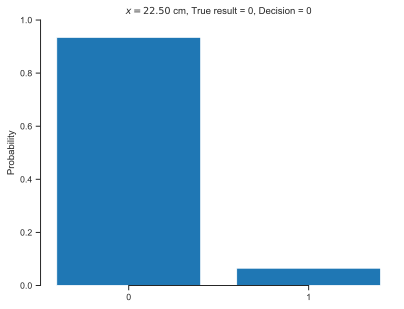

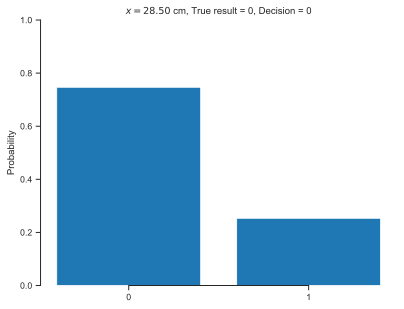

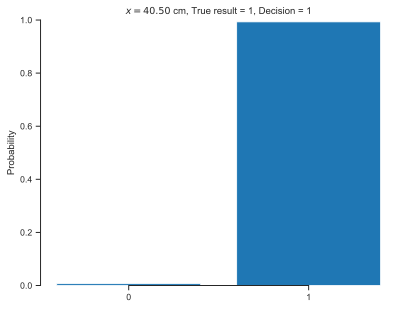

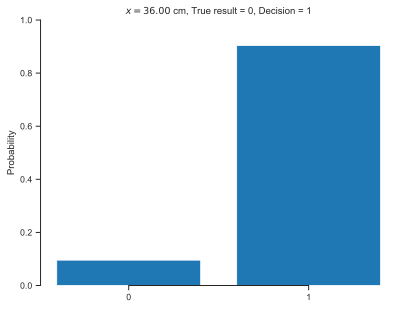

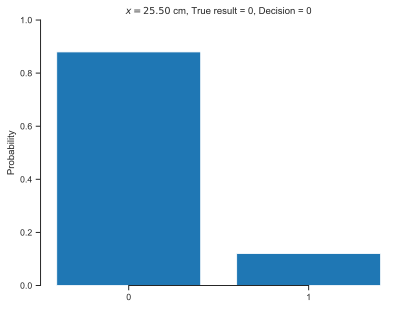

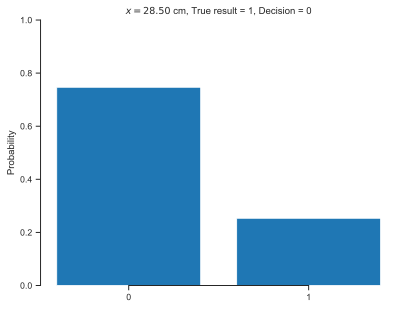

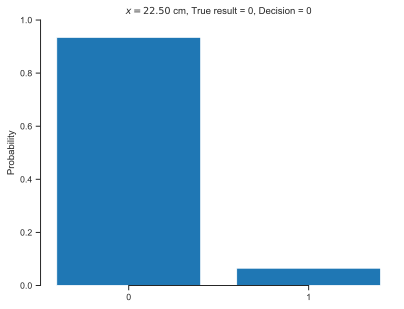

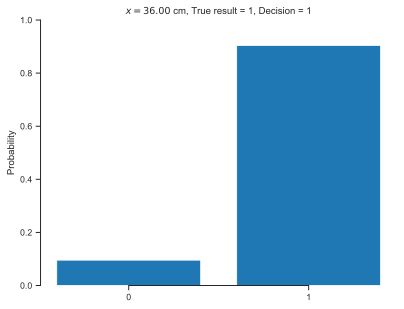

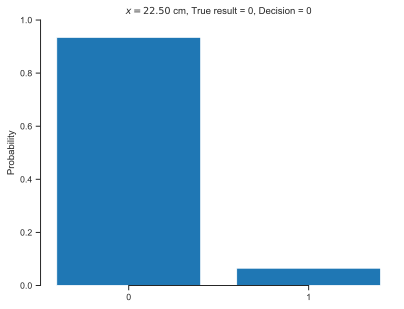

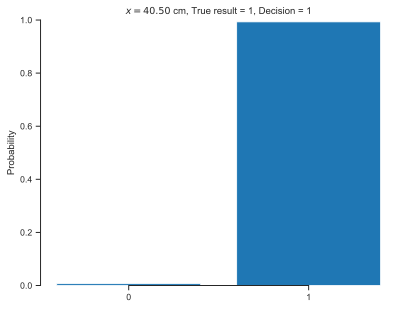

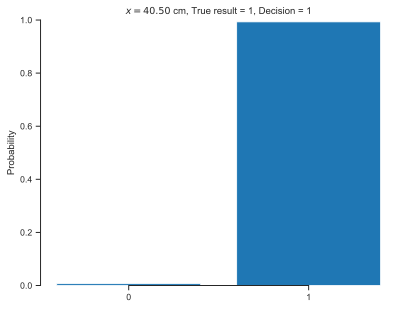

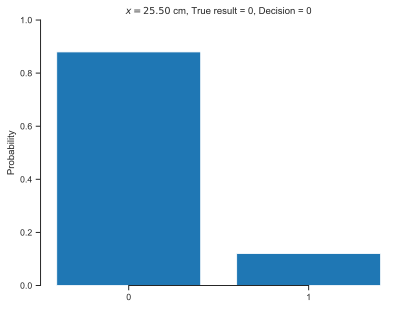

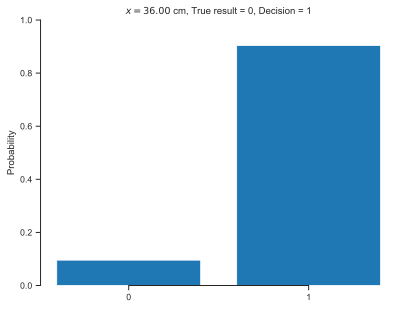

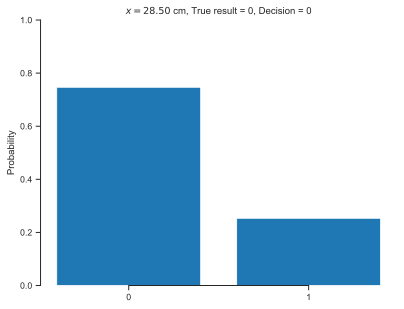

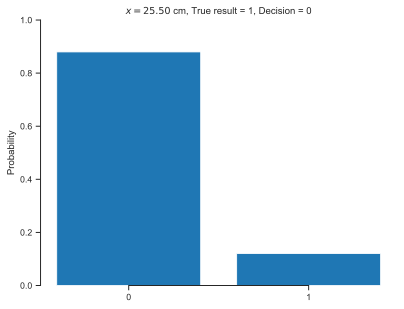

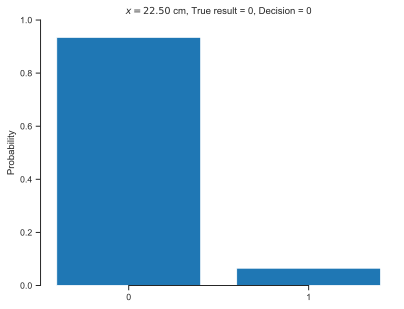

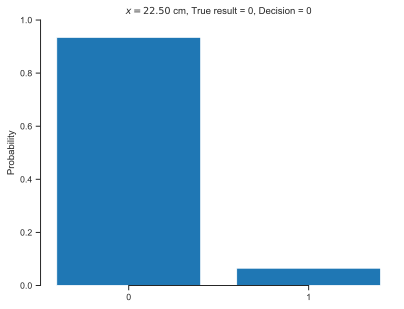

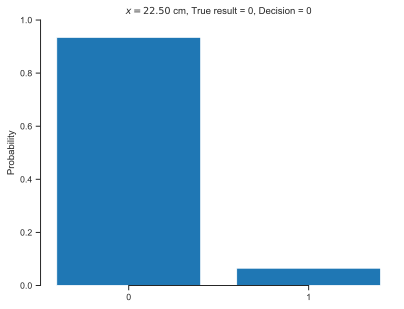

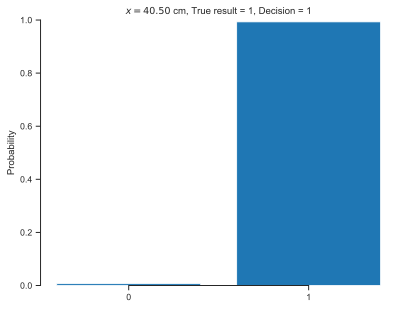

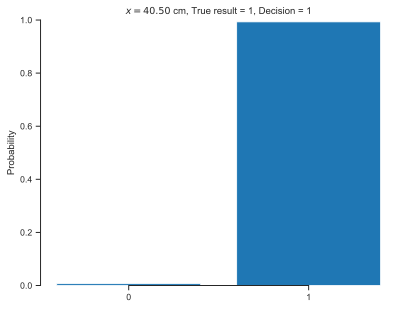

In [11]:
for i in range(x_valid.shape[0]):
    # Make decision
    decision = model.classes_[np.argmin(exp_cost[i])]
    fig, ax = plt.subplots()
    ax.bar(np.arange(2), predictions[i])
    ax.set_title(
        f'$x={x_valid[i]:1.2f}$ cm, '
        + f'True result = {y_valid[i]:d}, '
        + f'Decision = {decision:d}'
    )
    ax.set_ylim([0, 1.0])
    ax.set_xticks([0, 1])
    ax.set_xticklabels(model.classes_)
    ax.set_ylabel('Probability')
    sns.despine(trim=True)

Now let's plot the decision boundary of our model:

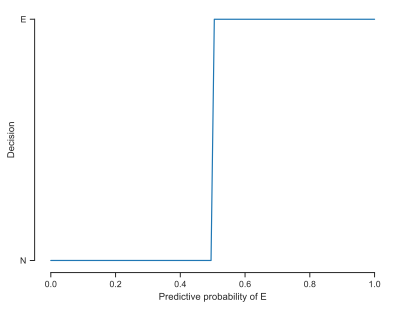

In [12]:
fig, ax = plt.subplots()
pE = np.linspace(0, 1, 100)
pN = 1.0 - pE
probs = np.hstack([pN[:, None], pE[:, None]])
exp_cost = np.einsum('ij,kj->ki', cost_matrix, probs)
decision_idx = np.argmin(exp_cost, axis=1)
ax.plot(pE, decision_idx)
ax.set_yticks([0, 1])
ax.set_yticklabels(['N', 'E'])
ax.set_ylabel('Decision')
ax.set_xlabel('Predictive probability of E')
sns.despine(trim=True)

### Questions

+ Repeat the analysis above with a different cost matrix that penalizes more by calling a non-explosion when there is an explosion.